In [82]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('/Users/stella/Downloads')

In [31]:
import pandas as pd
df=pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [165]:
df.Country.unique()
len(df.Country.unique())

101

In [33]:
df=df.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age',
                      'suicides_no':'SuicidesNo','population':'Population','suicides/100k pop':'Suicides100kPop',
                      'country-year':'CountryYear','HDI for year':'HDIForYear',
                      ' gdp_for_year ($) ':'GdpPerYear','gdp_per_capita ($)':'GdpPerCapital',
                      'generation':'Generation'})


In [34]:
df.columns

Index(['Country', 'Year', 'Gender', 'Age', 'SuicidesNo', 'Population',
       'Suicides100kPop', 'CountryYear', 'HDIForYear', 'GdpPerYear',
       'GdpPerCapital', 'Generation'],
      dtype='object')

In [38]:
suicidesNO=[]
for country in df.Country.unique():
    suicidesNO.append(sum(df[df['Country']==country].SuicidesNo))

In [41]:
suicidesNO = pd.DataFrame(suicidesNO,columns=['suicidesNO'])
country=pd.DataFrame(df.Country.unique(),columns=['country'])
dt_suicide=pd.concat([suicidesNO,country],axis=1)

In [46]:
dt_suicide=dt_suicide.sort_values(by='suicidesNO',ascending=False)


Text(0, 0.5, 'Country')

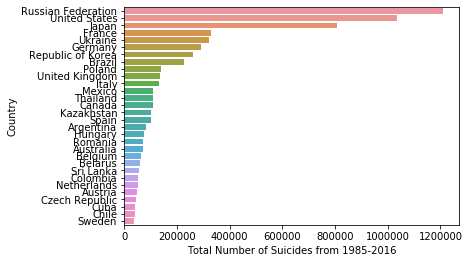

In [179]:
sns.barplot(y=dt_suicide.country[:30], x=dt_suicide.suicidesNO[:30])
plt.show
plt.xlabel('Total Number of Suicides from 1985-2016')
plt.ylabel('Country')

In [151]:
my_pal = {"Generation X": "b", "Silent": "g", "G.I. Generation": "r", "Boomers": "c", "Millenials": "m", "Generation Z": "k"}

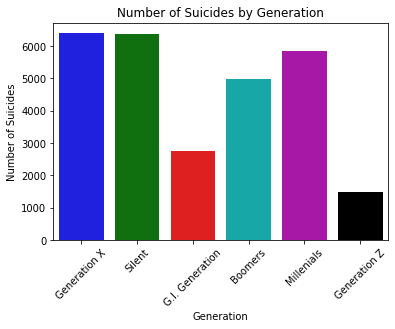

In [181]:
sns.countplot(df.Generation, palette = my_pal)
plt.title('Number of Suicides by Generation')
plt.xticks(rotation=45)
plt.ylabel('Number of Suicides')
plt.show()

In [ ]:
sui_mean =ave

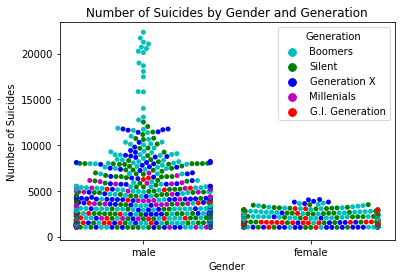

In [182]:
list1=df[df.SuicidesNo>1000]
sns.swarmplot(x="Gender", y="SuicidesNo",hue="Generation", data=list1, palette = my_pal)
plt.title('Number of Suicides by Gender and Generation')
plt.ylabel('Number of Suicides')
plt.show()

In [52]:
df['Age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [56]:
index_population=[]
for age in df['Age'].unique():
    index_population.append(sum(df[df['Age']==age].Population)/len(df[df['Age']==age].Population))

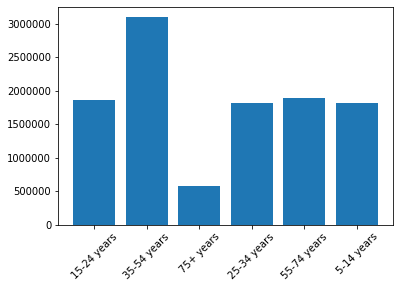

In [59]:
plt.bar(['15-24 years','35-54 years','75+ years','25-34 years','55-74 years','5-14 years'],index_population, align='center')
plt.xticks(rotation=45)
plt.show()

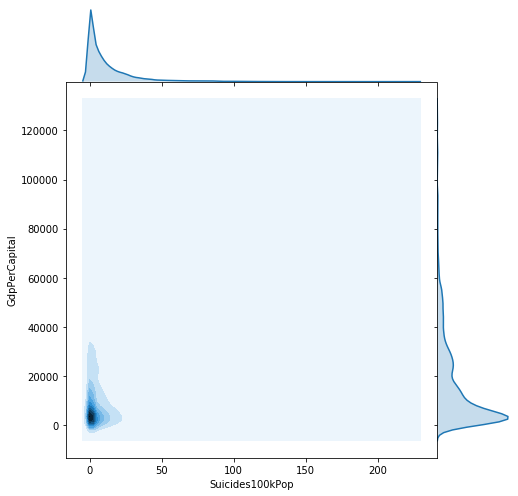

In [107]:
#examine relation of year
g = sns.jointplot(df.Suicides100kPop,df.GdpPerCapital, kind="kde", height=7, space=0)
plt.show()

In [110]:
fig=sns.jointplot(y='GdpPerCapital',x='SuicidesNo',kind='hex',data=df[df]])
plt.show()

SyntaxError: invalid syntax (<ipython-input-110-5bae68f9dccb>, line 1)

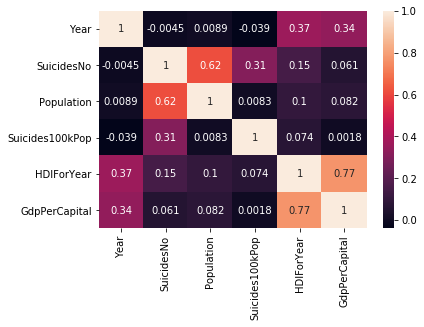

In [73]:
sns.heatmap(df.corr(),annot=True)
plt.show()

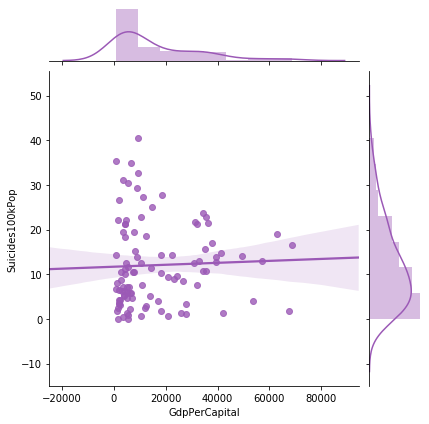

In [166]:
#suicides and GDP
byCountry = df.groupby('Country').mean().sort_values('Suicides100kPop', ascending=False).reset_index()
g=sns.jointplot(x='GdpPerCapital', y='Suicides100kPop',data=byCountry,kind='regression')

In [94]:
#United States Case 
us=df[df['Country']=='United States']

In [95]:
us_year = us.groupby('Year').mean().reset_index()
us_gender=us.groupby(['Gender','Year']).mean().reset_index
us_age=us.groupby(['Age','Year']).mean().reset_index

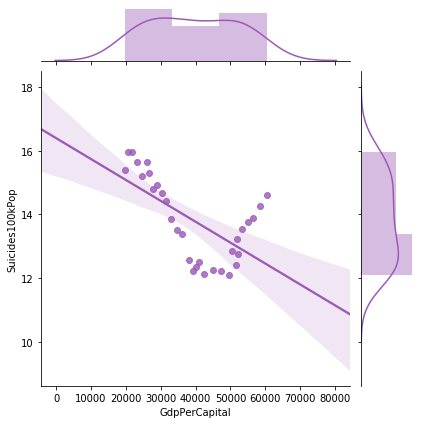

In [167]:
g = sns.jointplot(x="GdpPerCapital", y="Suicides100kPop", data=us_year, kind='regression')


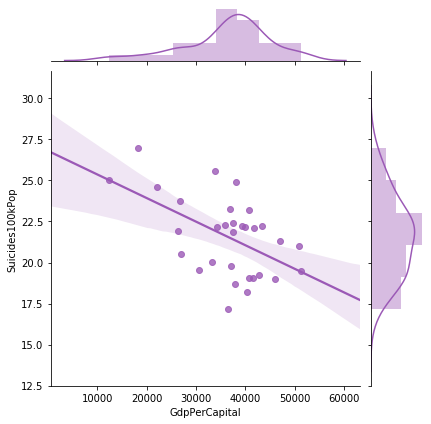

In [168]:
jp=df[df['Country']=='Japan']
jp_year = jp.groupby('Year').mean().reset_index()
jp_gender=jp.groupby(['Gender','Year']).mean().reset_index
jp_age=jp.groupby(['Age','Year']).mean().reset_index
g = sns.jointplot(x="GdpPerCapital", y="Suicides100kPop", data=jp_year, kind='regression')

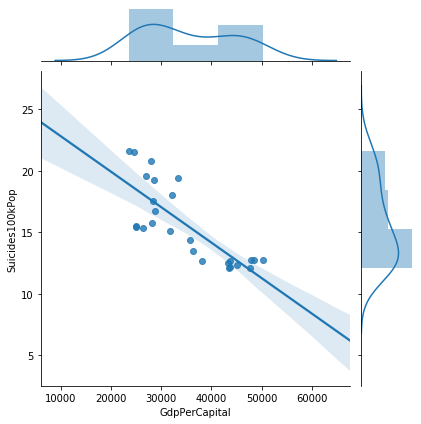

In [136]:
Ger=df[df['Country']=='Germany']
Ger_year = Ger.groupby('Year').mean().reset_index()
Ger_gender=Ger.groupby(['Gender','Year']).mean().reset_index
Ger_age=Ger.groupby(['Age','Year']).mean().reset_index
g = sns.jointplot(x="GdpPerCapital", y="Suicides100kPop", data=Ger_year, kind='regression')

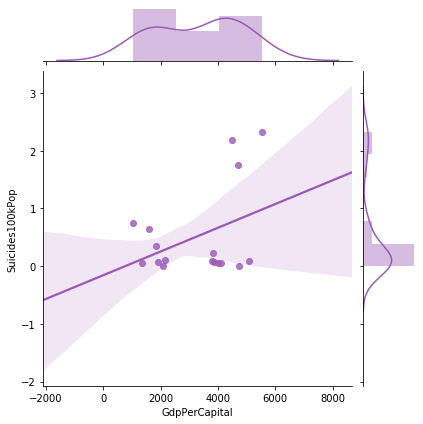

In [169]:
jm=df[df['Country']=='Jamaica']
jm_year = jm.groupby('Year').mean().reset_index()
jm_gender=jm.groupby(['Gender','Year']).mean().reset_index
jm_age=jm.groupby(['Age','Year']).mean().reset_index
g = sns.jointplot(x="GdpPerCapital", y="Suicides100kPop", data=jm_year, kind='regression')

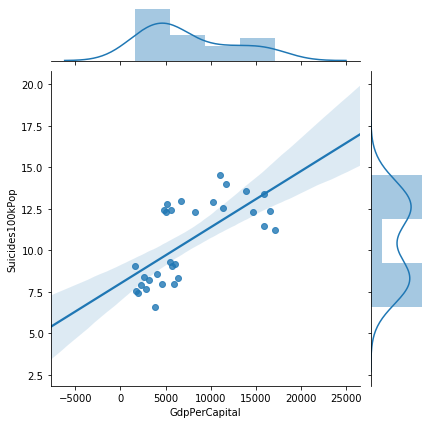

In [100]:
chile=df[df['Country']=='Chile']
chile_year = chile.groupby('Year').mean().reset_index()
chile_gender=chile.groupby(['Gender','Year']).mean().reset_index
chile_age=chile.groupby(['Age','Year']).mean().reset_index
g = sns.jointplot(x="GdpPerCapital", y="Suicides100kPop", data=chile_year, kind='regression')

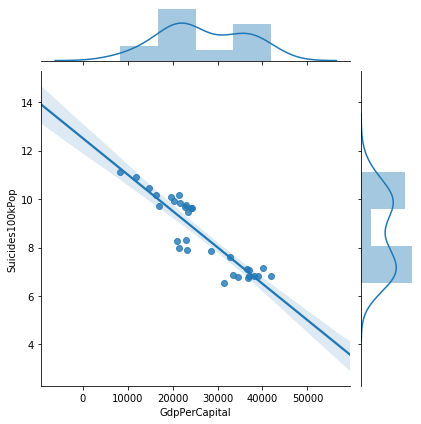

In [134]:
it=df[df['Country']=='Italy']
it_year = it.groupby('Year').mean().reset_index()
it_gender=it.groupby(['Gender','Year']).mean().reset_index
it_age=it.groupby(['Age','Year']).mean().reset_index
g = sns.jointplot(x="GdpPerCapital", y="Suicides100kPop", data=it_year, kind='regression')

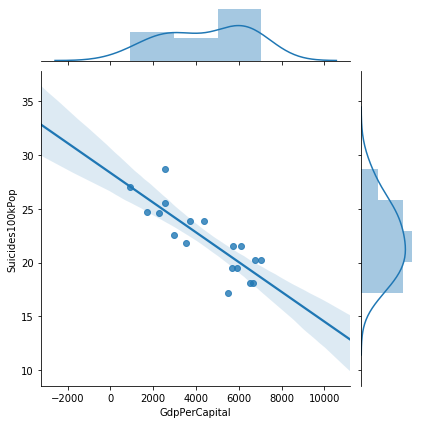

In [129]:
Serbia=df[df['Country']=='Serbia']
Serbia_year = Serbia.groupby('Year').mean().reset_index()
Serbia_gender=Serbia.groupby(['Gender','Year']).mean().reset_index
Serbia_age=Serbia.groupby(['Age','Year']).mean().reset_index
g = sns.jointplot(x="GdpPerCapital", y="Suicides100kPop", data=Serbia_year, kind='regression')

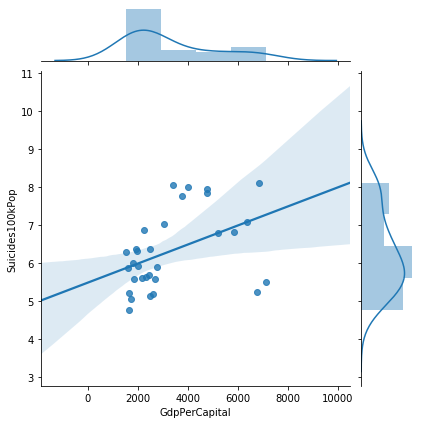

In [135]:
Ecua=df[df['Country']=='Ecuador']
Ecua_year = Ecua.groupby('Year').mean().reset_index()
Ecua_gender=Ecua.groupby(['Gender','Year']).mean().reset_index
Ecua_age=Ecua.groupby(['Age','Year']).mean().reset_index
g = sns.jointplot(x="GdpPerCapital", y="Suicides100kPop", data=Ecua_year, kind='regression')

In [85]:
import os

In [88]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

AttributeError: module 'matplotlib.pyplot' has no attribute 'margines'

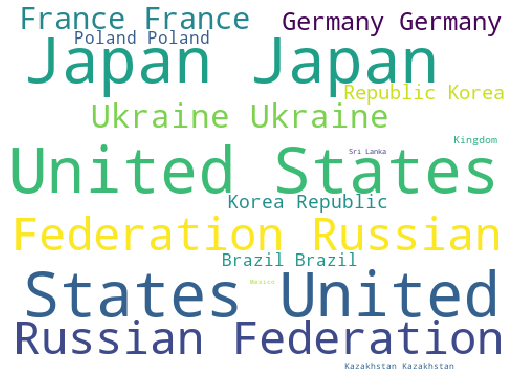

In [92]:
df_word = df[df.SuicidesNo>1500]
plt.subplots(figsize = (9,9))
wordcloud= WordCloud(
    background_color = 'white',
                      width=480,
                      height=350
    ).generate(" ".join(df_word.Country))
plt.imshow(wordcloud)
plt.axis('off')
plt.margines(x=0,y=0)
plt.show()

In [174]:
#gender
gender_df=pd.DataFrame({
    "Year":df.Year,
    "Gender":df.Gender,
    "SuicidesNo":df.SuicidesNo
    
})

In [175]:
gender_suicide=gender_df.pivot_table(index='Year',columns='Gender',aggfunc='mean')

In [176]:
gender_suicide.head()

SuicidesNo            
Gender      female        male
Year                          
1985    112.774306  290.222222
1986    117.541667  301.451389
1987    108.043210  283.444444
1988    112.295918  299.357143
1989    132.567308  381.035256

In [119]:
x=gender_suicide.index



In [122]:
gender_suicide.columns=['female','male']
gender_suicide.head()

,female,male
Year,,
1985,112.774306,290.222222
1986,117.541667,301.451389
1987,108.043210,283.444444
1988,112.295918,299.357143
1989,132.567308,381.035256


In [124]:
female=gender_suicide['female']
male=gender_suicide['male']

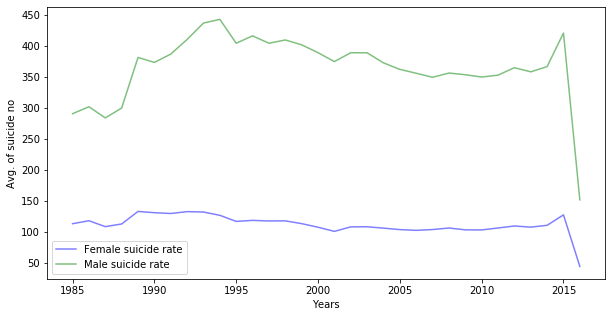

In [125]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(x, female, color="blue", alpha=0.5 , label='Female suicide rate')
ax.plot(x, male, color="green", alpha=0.5 , label="Male suicide rate")
ax.set_xlabel('Years')
ax.set_ylabel('Avg. of suicide no')
ax.legend()